# GOLD PRICE SINCE 1964 to 2022

In [24]:
from bs4 import BeautifulSoup
import requests

In [25]:
url="https://www.bankbazaar.com/gold-rate/gold-rate-trend-in-india.html"
data=requests.get(url).text

In [26]:
soup=BeautifulSoup(data,"html.parser")

In [150]:
#print(soup.prettify())

In [29]:
import pandas as pd

In [56]:
gold_data=pd.DataFrame(columns=["Year","Price_24karat_per_10gm"])

In [57]:
gold_data

,Year,Price_24karat_per_10gm


In [123]:
for row in soup.find("tbody").find_all("tr"):
    col=row.find_all('td')
    y=col[0].text
    p=col[1].text
    gold_data=gold_data.append({"Year":y,"Price_24karat_per_10gm":p},ignore_index=True)

In [68]:
gold_data["Year"]=gold_data["Year"].str.replace('(Till Today)',"")

<ipython-input-68-d25ba235b5ba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_data["Year"]=gold_data["Year"].str.replace('(Till Today)',"")


In [78]:
gold_data["Year"]=gold_data["Year"].str.replace('(',"")
gold_data["Year"]=gold_data["Year"].str.replace(')',"")

<ipython-input-78-8a2d581f9a26>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gold_data["Year"]=gold_data["Year"].str.replace('(',"")
<ipython-input-78-8a2d581f9a26>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gold_data["Year"]=gold_data["Year"].str.replace(')',"")


In [81]:
gold_data["Year"]=gold_data["Year"].astype("int")

In [90]:
gold_data["Price_24karat_per_10gm"]=gold_data["Price_24karat_per_10gm"].str.replace('Rs.',"")
gold_data["Price_24karat_per_10gm"]=gold_data["Price_24karat_per_10gm"].str.replace(',',"")

<ipython-input-90-db41be889b9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_data["Price_24karat_per_10gm"]=gold_data["Price_24karat_per_10gm"].str.replace('Rs.',"")


In [92]:
gold_data["Price_24karat_per_10gm"]=gold_data["Price_24karat_per_10gm"].astype("float")

In [94]:
gold_data.describe()

,Year,Price_24karat_per_10gm
count,58.000000,58.000000
mean,1992.293103,9135.737069
std,16.850226,12917.888913
min,1964.000000,63.250000
25%,1978.250000,748.000000
50%,1992.000000,4092.500000
75%,2006.500000,9850.000000
max,2022.000000,52690.000000


In [95]:
import matplotlib.pyplot as plt

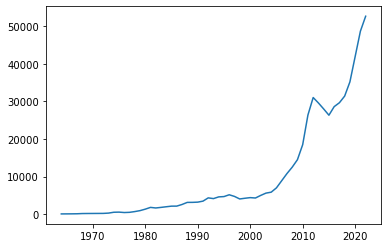

In [106]:
x=gold_data["Year"]
y=gold_data["Price_24karat_per_10gm"]
plt.plot(x,y)

In [108]:
gold_data.head(2)

,Year,Price_24karat_per_10gm
0,1964,63.25
1,1965,71.75


In [109]:
import numpy as np

In [113]:
bins=np.linspace(min(gold_data["Price_24karat_per_10gm"]),max(gold_data["Price_24karat_per_10gm"]),4)
group=["low","medium","high"]
gold_data["Binned"]=pd.cut(gold_data["Price_24karat_per_10gm"],bins,labels=group,include_lowest=True)

In [114]:
gold_data

,Year,Price_24karat_per_10gm,Binned
0,1964,63.25,low
1,1965,71.75,low
2,1966,83.75,low
3,1967,102.50,low
4,1968,162.00,low
5,1969,176.00,low
6,1970,184.00,low
7,1971,193.00,low
8,1972,202.00,low
9,1973,278.50,low


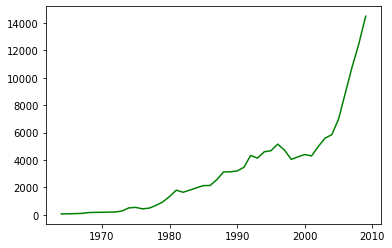

In [122]:
x=gold_data["Year"].head(46)
y=gold_data["Price_24karat_per_10gm"].head(46)
plt.plot(x,y,color='g')

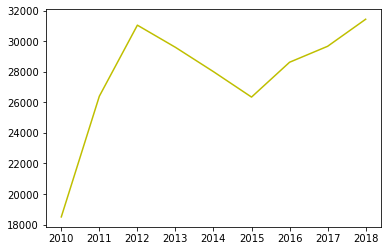

In [120]:
x=gold_data["Year"].iloc[46:55]
y=gold_data["Price_24karat_per_10gm"].iloc[46:55]
plt.plot(x,y,color='y')

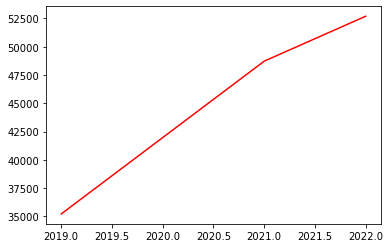

In [121]:
x=gold_data["Year"].tail(3)
y=gold_data["Price_24karat_per_10gm"].tail(3)
plt.plot(x,y,color='r')

In [133]:
x=gold_data.at[0,"Price_24karat_per_10gm"]
y=gold_data.at[57,"Price_24karat_per_10gm"]

In [145]:
print("Since 1964 there has been increment in gold price by {}%".format(round((y-x)/y*100,5)))

Since 1964 there has been increment in gold price by 99.87996%


In [146]:
x=gold_data.at[55,"Price_24karat_per_10gm"]
y=gold_data.at[57,"Price_24karat_per_10gm"]
print("Since 2019 there has been increment in gold price by {}%".format(round((y-x)/y*100,5)))

Since 2019 there has been increment in gold price by 33.1562%
